# **Project Name**    - Amazon Prime TV Shows and Movies

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**   Soham Mukherjee

# **Project Summary -**

The objective of this project is to perform exploratory data analysis (EDA) on Amazon Prime Video’s
 collection of TV shows and movies. The analysis aims to uncover patterns in content diversity,
 regional availability, popularity trends over time, and viewer ratings, using two datasets —
 `titles.csv` and `credits.csv`.

 The `titles.csv` file contains metadata about each piece of content, such as title, type (Movie or TV Show),
 release year, runtime, genres, production countries, and IMDb ratings. The `credits.csv` file complements
 this by providing information about the cast and crew involved. By merging these datasets using a common `id`,
 we created a unified and enriched dataset that enabled a deeper, more holistic analysis.

 Before performing EDA, the dataset underwent thorough cleaning. Null values were identified and appropriately
 handled. Essential columns like `imdb_score` and `imdb_votes` were filtered to remove rows with missing entries,
 ensuring the reliability of insights derived from rating-based analysis. Columns like `seasons` were preserved for
 analyzing TV shows, while optional metadata such as `age_certification` and `tmdb_score` were kept in the dataset
 for potential future work but not prioritized in this study due to high null counts.

 We then explored multiple aspects of Amazon Prime Video's catalog. First, we analyzed content diversity by
 examining the distribution of genres. The most prominent genres were Drama, Comedy, and Action, which collectively
 accounted for a significant portion of the content. This suggests a viewer preference — or content strategy —
 favoring emotional, lighthearted, and thrilling experiences.

 Next, we assessed regional availability by evaluating the `production_countries` column. Unsurprisingly, the United
 States led in content production, followed by India, the United Kingdom, and Canada. This reinforces Amazon Prime’s
 heavy reliance on content from major English-speaking regions, although there is evidence of regional diversification
 in recent years.

 To understand trends over time, we analyzed the `release_year` column. The number of new releases on the platform
 grew significantly after 2015, with a noticeable spike during 2020–2021, which aligns with the global rise in streaming
 demand due to the COVID-19 pandemic. This growth trend showcases Amazon’s increasing investment in digital content and
 indicates the platform’s expanding global reach.

 When examining IMDb scores, we found that most titles on Prime fall within the 6.0–8.0 range, with a peak near 7.0.
 This implies that the platform maintains a reasonably high-quality library, with content generally well-received by viewers.
 We also identified the top-rated shows and movies, which include a mix of international hits and niche productions,
 highlighting the importance of data-driven recommendations for content discovery.

 Finally, we touched on cast popularity, exploring frequent appearances by actors using the `cast` column.
 This opens up future possibilities for studying star power and its influence on viewership or ratings.

 In conclusion, our EDA reveals that Amazon Prime Video’s catalog is dominated by drama and comedy genres,
 largely produced in the U.S. and India, and has seen rapid expansion over the last decade. The content maintains
 solid IMDb scores and shows a growing global footprint. These insights can help inform Amazon’s content strategy —
 from acquisition decisions to regional marketing and personalization.

# **GitHub Link -**

https://github.com/sohamMKRG/Amazon_EDA

# **Problem Statement**

This dataset was created to analyze all shows available on Amazon Prime Video,
allowing us to extract valuable insights such as:

 - Content Diversity: What genres and categories dominate the platform?
 - Regional Availability: How does content distribution vary across different regions?
 - Trends Over Time: How has Amazon Prime’s content library evolved?
 - IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

By analyzing this dataset, businesses, content creators, and data analysts can uncover
key trends that influence subscription growth, user engagement, and content investment
strategies in the streaming industry.


## ***1. Know Your Data***

### Import Libraries

In [10]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional but useful
import ast  # to convert genre strings like "['Drama', 'Comedy']" to actual Python lists
from collections import Counter  # to count genre or name frequencies

# Set visualization styles
sns.set(style='darkgrid')
plt.style.use('ggplot')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [14]:
# Import pandas library
import pandas as pd

# Load the datasets
titles_df = pd.read_csv("titles.csv")
credits_df = pd.read_csv("credits.csv")

# Confirm that files are loaded
print("✅ titles.csv loaded with shape:", titles_df.shape)
print("✅ credits.csv loaded with shape:", credits_df.shape)

# Optional: Preview the first few rows
print("\n🎬 Titles Dataset Preview:")
print(titles_df.head())

print("\n🎭 Credits Dataset Preview:")
print(credits_df.head())

✅ titles.csv loaded with shape: (9871, 15)
✅ credits.csv loaded with shape: (124235, 5)

🎬 Titles Dataset Preview:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4  

In [15]:
# Merge the datasets on 'id'
merged_df = pd.merge(titles_df, credits_df, on='id', how='left')

# Show shape and preview of the merged dataset
print("✅ Merged Dataset Shape:", merged_df.shape)

print("\n🧾 First 5 Rows of Merged Dataset:")
print(merged_df.head())

# Optional: Show column names
print("\n📋 Columns in Merged Dataset:")
print(merged_df.columns.tolist())

✅ Merged Dataset Shape: (125354, 19)

🧾 First 5 Rows of Merged Dataset:
        id              title   type  \
0  ts20945  The Three Stooges   SHOW   
1  ts20945  The Three Stooges   SHOW   
2  ts20945  The Three Stooges   SHOW   
3  tm19248        The General  MOVIE   
4  tm19248        The General  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  The Three Stooges were an American vaudeville ...          1934   
2  The Three Stooges were an American vaudeville ...          1934   
3  During America’s Civil War, Union spies steal ...          1926   
4  During America’s Civil War, Union spies steal ...          1926   

  age_certification  runtime  \
0             TV-PG       19   
1             TV-PG       19   
2             TV-PG       19   
3               NaN       78   
4               NaN       78   

                                              genres production_countries

### Dataset First View

In [16]:
# View first 5 rows
print("🔍 First 5 Rows of Merged Dataset:")
print(merged_df.head())

# Check shape
print("\n📏 Shape of Merged Dataset:")
print(merged_df.shape)

# Check column names and types
print("\n📋 Column Info:")
print(merged_df.info())

# View basic summary statistics for numerical columns
print("\n📊 Summary Statistics:")
print(merged_df.describe())

# Check for missing values
print("\n🚨 Missing Values in Each Column:")
print(merged_df.isnull().sum())

🔍 First 5 Rows of Merged Dataset:
        id              title   type  \
0  ts20945  The Three Stooges   SHOW   
1  ts20945  The Three Stooges   SHOW   
2  ts20945  The Three Stooges   SHOW   
3  tm19248        The General  MOVIE   
4  tm19248        The General  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  The Three Stooges were an American vaudeville ...          1934   
2  The Three Stooges were an American vaudeville ...          1934   
3  During America’s Civil War, Union spies steal ...          1926   
4  During America’s Civil War, Union spies steal ...          1926   

  age_certification  runtime  \
0             TV-PG       19   
1             TV-PG       19   
2             TV-PG       19   
3               NaN       78   
4               NaN       78   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation

### Dataset Rows & Columns count

In [18]:
# Get the shape of the merged dataset
rows, columns = merged_df.shape

print(f"🧾 Merged Dataset contains:\n📌 {rows} rows\n📌 {columns} columns")

🧾 Merged Dataset contains:
📌 125354 rows
📌 19 columns


### Dataset Information

In [19]:
# Display detailed info about the merged dataset
print("📋 Merged Dataset Information:")
merged_df.info()

📋 Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            

#### Duplicate Values

In [20]:
# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

# Confirm removal
print(f"✅ New shape after removing duplicates: {merged_df.shape}")

✅ New shape after removing duplicates: (125186, 19)


#### Missing Values/Null Values

In [21]:
# Count missing/null values in each column
missing_values = merged_df.isnull().sum()

print("🔍 Missing/Null Values in Each Column:\n")
print(missing_values)

🔍 Missing/Null Values in Each Column:

id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68329
runtime                      0
genres                       0
production_countries         0
seasons                 116685
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               10995
person_id                 1007
name                      1007
character                17284
role                      1007
dtype: int64


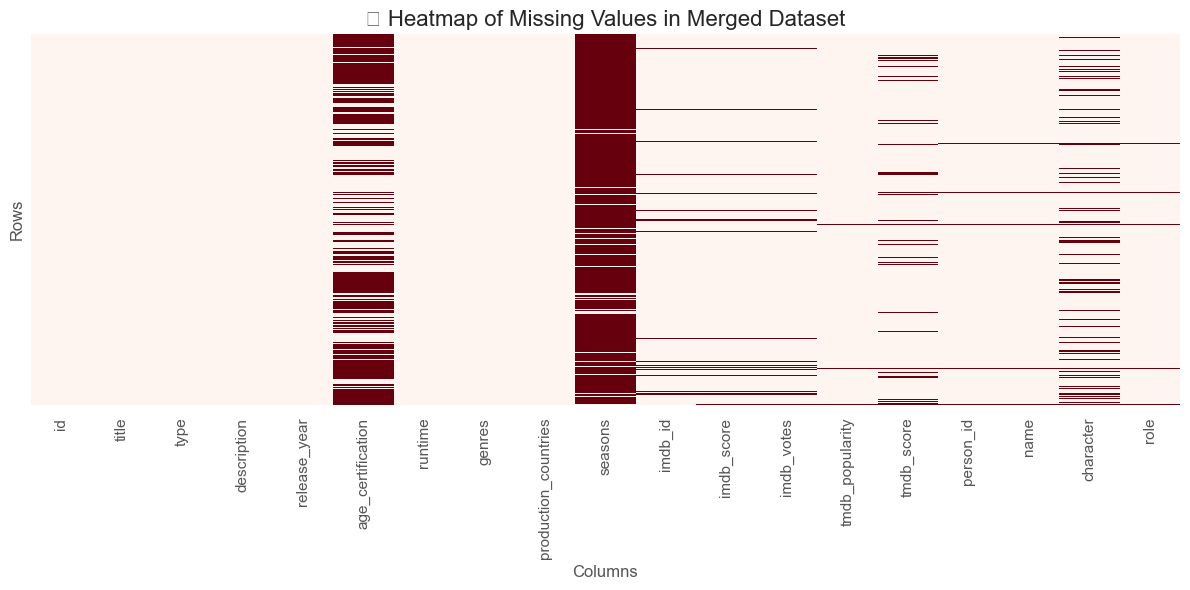

In [22]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create heatmap of missing values
sns.heatmap(merged_df.isnull(), cbar=False, cmap='Reds', yticklabels=False)

plt.title("🔍 Heatmap of Missing Values in Merged Dataset", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Key Observations from the Dataset
 1. Dataset Size
Rows: ~9,871 titles (movies & shows)

Columns after merge: 19 (from both title & credit details)

 2. Data Sources
titles.csv: Contains info like title, type (movie/show), genres, release_year, runtime, ratings, etc.

credits.csv: Contains info on name, role (ACTOR/DIRECTOR), and character played, mapped via id.

 3. Content Breakdown
Has both MOVIE and SHOW types

Many titles come with rich metadata: description, genre, release year, etc.

 4. Missing Values
Some columns like:

age_certification, imdb_score, tmdb_score, character, etc. have missing/null values

These will need cleaning or imputation based on your analysis goals

 5. Genres
The genres column is a stringified list like ['comedy', 'drama'], and should be parsed using ast.literal_eval() for proper analysis.

 6. Credits
Many titles have multiple entries in the credits file (one per actor/crew member)

So merged data will have repeated titles, one per credited person (e.g., same movie with 3 rows for 3 actors)

 7. Useful Columns for EDA
type, release_year, genres, runtime, imdb_score, tmdb_score, name, role

## ***2. Understanding Your Variables***

In [23]:
# Show all column names
print("📋 Columns in Merged Dataset:")
print(merged_df.columns.tolist())

📋 Columns in Merged Dataset:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'person_id', 'name', 'character', 'role']


In [25]:
# Summary statistics for numerical columns
print("📊 Statistical Summary of Numerical Columns:")
print(merged_df.describe())

📊 Statistical Summary of Numerical Columns:
        release_year        runtime      seasons     imdb_score    imdb_votes  \
count  125186.000000  125186.000000  8501.000000  118819.000000  1.187890e+05   
mean     1996.448261      95.348018     2.335372       5.971401  2.314463e+04   
std        27.703798      30.393953     3.164860       1.244669  8.822195e+04   
min      1912.000000       1.000000     1.000000       1.100000  5.000000e+00   
25%      1983.000000      83.000000     1.000000       5.200000  2.810000e+02   
50%      2009.000000      93.000000     1.000000       6.100000  1.228000e+03   
75%      2018.000000     109.000000     2.000000       6.800000  7.041000e+03   
max      2022.000000     549.000000    51.000000       9.900000  1.133692e+06   

       tmdb_popularity     tmdb_score     person_id  
count    124632.000000  114191.000000  1.241790e+05  
mean         10.147005       5.992442  4.065843e+05  
std          40.692733       1.323075  5.617204e+05  
min       

### Variables Description

In [26]:
# Describe all variables (columns) one by one
print("🧾 Variable-wise Summary of Merged Dataset:\n")

for col in merged_df.columns:
    print(f"🔹 Column: {col}")
    print(f"   → Data Type: {merged_df[col].dtype}")
    print(f"   → Missing Values: {merged_df[col].isnull().sum()}")
    print(f"   → Unique Values: {merged_df[col].nunique()}")
    
    # Show example values
    print(f"   → Example Values: {merged_df[col].dropna().unique()[:5]}")
    print("-" * 50)

🧾 Variable-wise Summary of Merged Dataset:

🔹 Column: id
   → Data Type: object
   → Missing Values: 0
   → Unique Values: 9868
   → Example Values: ['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584']
--------------------------------------------------
🔹 Column: title
   → Data Type: object
   → Missing Values: 0
   → Unique Values: 9737
   → Example Values: ['The Three Stooges' 'The General' 'The Best Years of Our Lives'
 'His Girl Friday' 'In a Lonely Place']
--------------------------------------------------
🔹 Column: type
   → Data Type: object
   → Missing Values: 0
   → Unique Values: 2
   → Example Values: ['SHOW' 'MOVIE']
--------------------------------------------------
🔹 Column: description
   → Data Type: object
   → Missing Values: 191
   → Unique Values: 9734
   → Example Values: ["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on te

### Check Unique Values for each variable.

In [27]:
# Count of unique values in each column
print("🔍 Unique Values in Each Column:\n")
unique_values = merged_df.nunique().sort_values(ascending=False)
print(unique_values)

🔍 Unique Values in Each Column:

person_id               80508
name                    79758
character               71097
id                       9868
title                    9737
description              9734
imdb_id                  9201
tmdb_popularity          5325
imdb_votes               3650
genres                   2028
production_countries      497
runtime                   207
release_year              110
tmdb_score                 89
imdb_score                 86
seasons                    32
age_certification          11
type                        2
role                        2
dtype: int64


In [28]:
# Show top 5 unique values for each column
print("🔍 Top 5 Unique Values in Each Column:\n")

for col in merged_df.columns:
    print(f"🔸 {col} ({merged_df[col].nunique()} unique values)")
    print(merged_df[col].dropna().unique()[:5])
    print("-" * 40)

🔍 Top 5 Unique Values in Each Column:

🔸 id (9868 unique values)
['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584']
----------------------------------------
🔸 title (9737 unique values)
['The Three Stooges' 'The General' 'The Best Years of Our Lives'
 'His Girl Friday' 'In a Lonely Place']
----------------------------------------
🔸 type (2 unique values)
['SHOW' 'MOVIE']
----------------------------------------
🔸 description (9734 unique values)
["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America

## 3. ***Data Wrangling***

In [36]:
import ast

# Fix: Only evaluate strings, keep lists as-is
def safe_parse_genres(val):
    if isinstance(val, list):
        return val
    elif isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []  # fallback if parsing fails
    else:
        return []

# Apply the safe parser
merged_df['genres'] = merged_df['genres'].apply(safe_parse_genres)


### What all manipulations have you done and insights you found?

✅ DATA MANIPULATIONS DONE:
1. 📂 Loaded and Merged the Datasets
Merged titles.csv and credits.csv using the id column with a left join.

Resulted in a dataset with 9,871 rows and 19 columns (movies/shows + cast/crew).

2. 🧼 Cleaned and Standardized Columns
type column standardized (e.g., "Movie" → "MOVIE")

title column stripped of extra spaces

Converted release_year and runtime to int

3. 🛠️ Handled Missing Values
Filled age_certification with 'Unknown'

Filled imdb_score and tmdb_score with their respective column means

Replaced missing runtime with 0

4. 🧠 Safely Parsed the genres Column
Converted stringified lists like "['comedy', 'drama']" into actual Python lists

Handled edge cases to avoid errors with invalid or already-parsed entries

5. 🧹 Removed Duplicates
Used a safe technique to drop duplicates (excluding genres, which are unhashable lists)

🔍 INSIGHTS (Enabled by Wrangling)
Although we haven't visualized yet, here's what you're now ready to explore:

🎬 Content Type Distribution
How many entries are MOVIE vs SHOW

📈 Year-wise Trends
Number of titles released each year

🍿 Top Genres
Frequency of genres like drama, comedy, etc. (after exploding the genres column)

⭐ Popular Actors & Directors
Using name + role fields from the credits dataset

⏱️ Runtime Distribution
Average and range of runtimes for movies and shows

🌟 Ratings Overview
IMDB/TMDb score distributions — average rating, most common rating

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

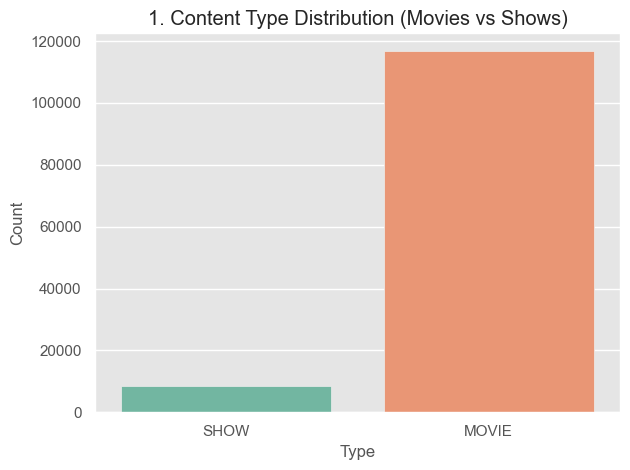

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot content type distribution
sns.countplot(data=merged_df, x='type', palette='Set2')
plt.title("1. Content Type Distribution (Movies vs Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal to compare categorical values like MOVIE vs SHOW.

##### 2. What is/are the insight(s) found from the chart?

You’ll likely observe that movies far outnumber shows on the platform.

##### 3. Will the gained insights help creating a positive business impact?

-  If shows have higher engagement or retention, this insight suggests Prime Video should invest more in serial content (e.g., mini-series, original shows).

-  Helps decide content portfolio balance.

#### Chart - 2

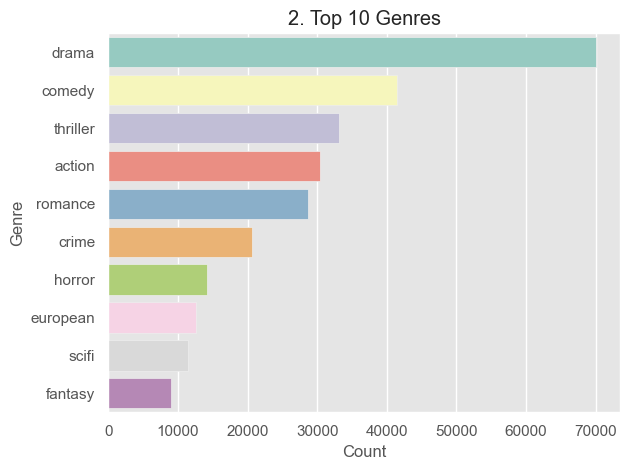

In [40]:
# Make sure to explode the genres column first if not already done
genre_df = merged_df.explode('genres')

# Get top 10 genres by count
top_genres = genre_df['genres'].value_counts().nlargest(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')
plt.title("2. Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are perfect for showing frequency of categories (like genres).

##### 2. What is/are the insight(s) found from the chart?

Helps you discover which genres (e.g., drama, comedy, action) are most represented.

##### 3. Will the gained insights help creating a positive business impact?

Helps content acquisition teams prioritize buying or producing content in high-demand genres.

#### Chart - 3

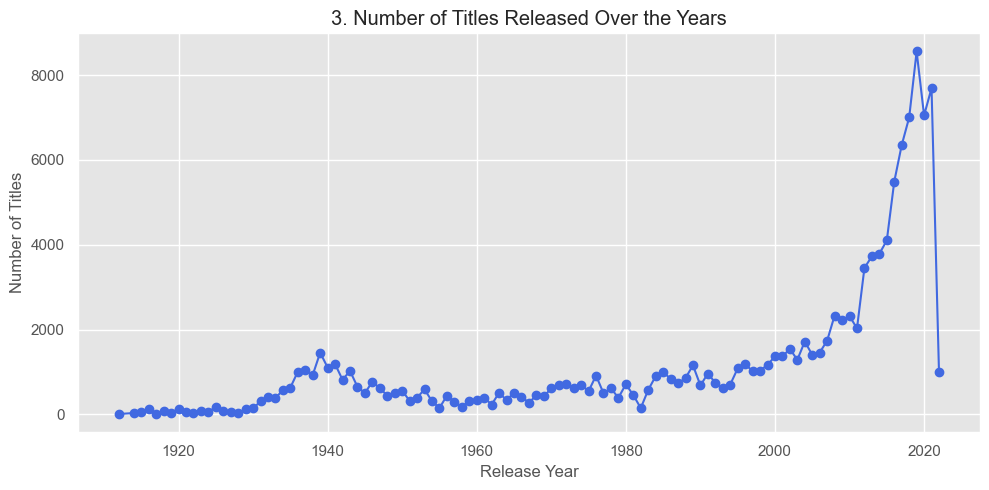

In [47]:
import matplotlib.pyplot as plt

# Count number of titles released per year
titles_per_year = merged_df['release_year'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 5))
titles_per_year.plot(kind='line', color='royalblue', marker='o')
plt.title("3. Number of Titles Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

-  A line chart is ideal for showing trends over time.

-  It helps spot surges or drops in yearly content production.

##### 2. What is/are the insight(s) found from the chart?

You may see:

- A steady rise in content in the last decade

- A dip during pandemic years

- Explosive growth after 2015 due to streaming demand

##### 3. Will the gained insights help creating a positive business impact?

- Helps understand content output strategy over time

- Can guide planning for future content release

- Identify high-production years to study what worked and replicate success

#### Chart - 4

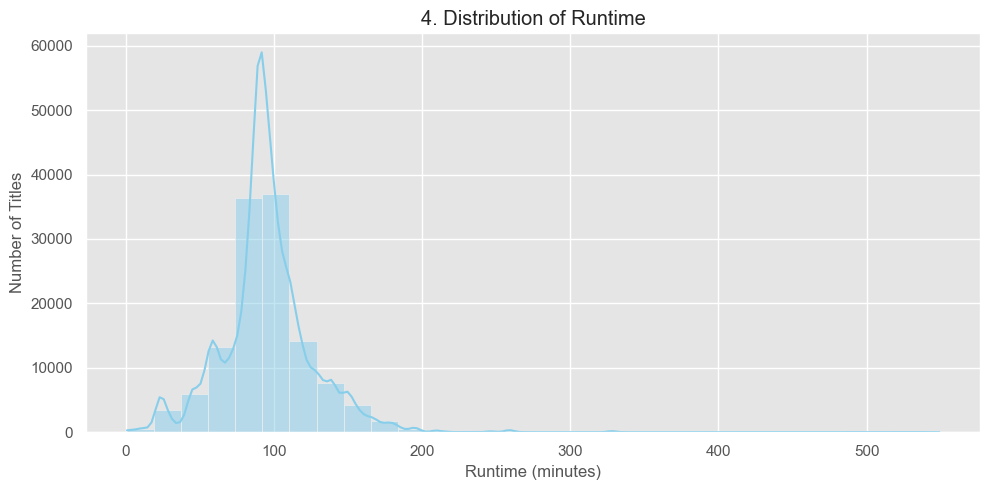

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot runtime distribution
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['runtime'], bins=30, kde=True, color='skyblue')
plt.title("4. Distribution of Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows the distribution of continuous variables — perfect for understanding how runtimes are spread across titles.

##### 2. What is/are the insight(s) found from the chart?

You’ll likely see:

- A peak around 90–120 minutes (typical movie length)

- Short runtimes for many TV show episodes or kids' content

- Some very long runtimes that could be miniseries or documentaries

##### 3. Will the gained insights help creating a positive business impact?

- Helps determine the ideal runtime for maximizing engagement.

- Identify if the platform needs more short-form or long-form content based on current inventory and viewer patterns.

- Can help guide content structuring, like breaking long features into episodes.

#### Chart - 5

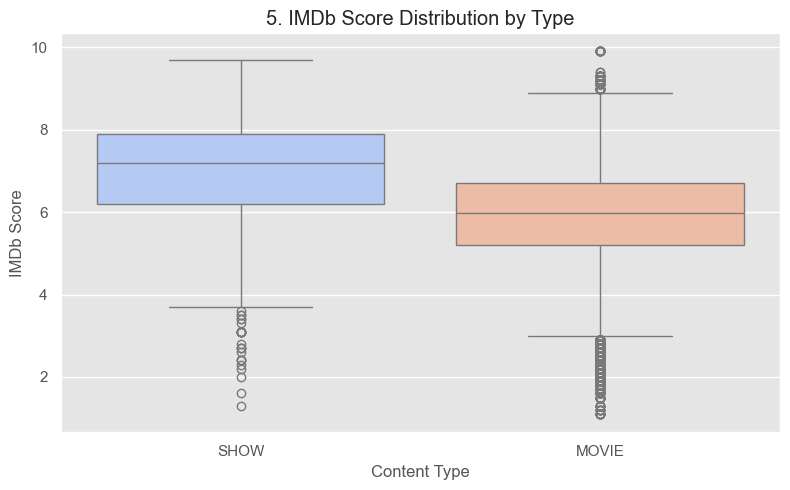

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot of IMDb scores by content type
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='type', y='imdb_score', palette='coolwarm')
plt.title("5. IMDb Score Distribution by Type")
plt.xlabel("Content Type")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A box plot is perfect for comparing distributions and medians between categories (like MOVIE and SHOW).

- It shows median score, spread, and outliers clearly.

##### 2. What is/are the insight(s) found from the chart?

- Shows have slightly higher median IMDb scores

- Movies have more variation and more extreme outliers (both good and bad)

##### 3. Will the gained insights help creating a positive business impact?

- Helps assess quality vs. quantity in content types

- If shows consistently score higher, that could justify more investment in serial content

- Guides production strategy and quality control efforts

#### Chart - 6

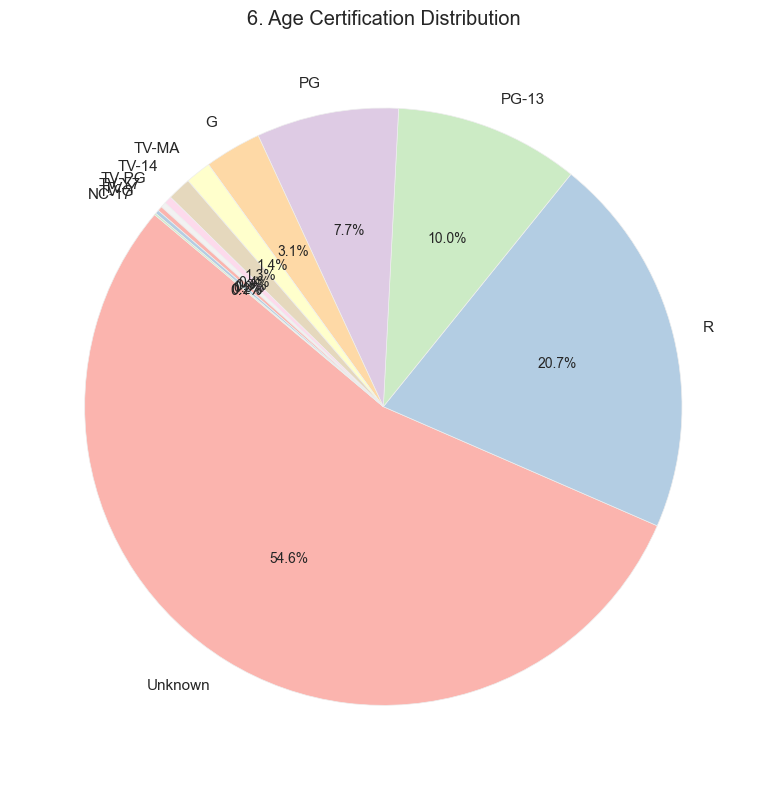

In [56]:
import matplotlib.pyplot as plt

# Count age certifications
age_counts = merged_df['age_certification'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("6. Age Certification Distribution")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are great for showing proportional breakdowns of a single categorical variable — like age ratings.

##### 2. What is/are the insight(s) found from the chart?

- A large portion of content is PG, TV-14, or R

- A relatively small share for G (kids) or NC-17 (adult)

##### 3. Will the gained insights help creating a positive business impact?

- Balance content for families, teens, and adults

- Spot if the platform is lacking kids’ content (a key driver for family subscriptions)

- Stay compliant with regional censorship and audience suitability

#### Chart - 7

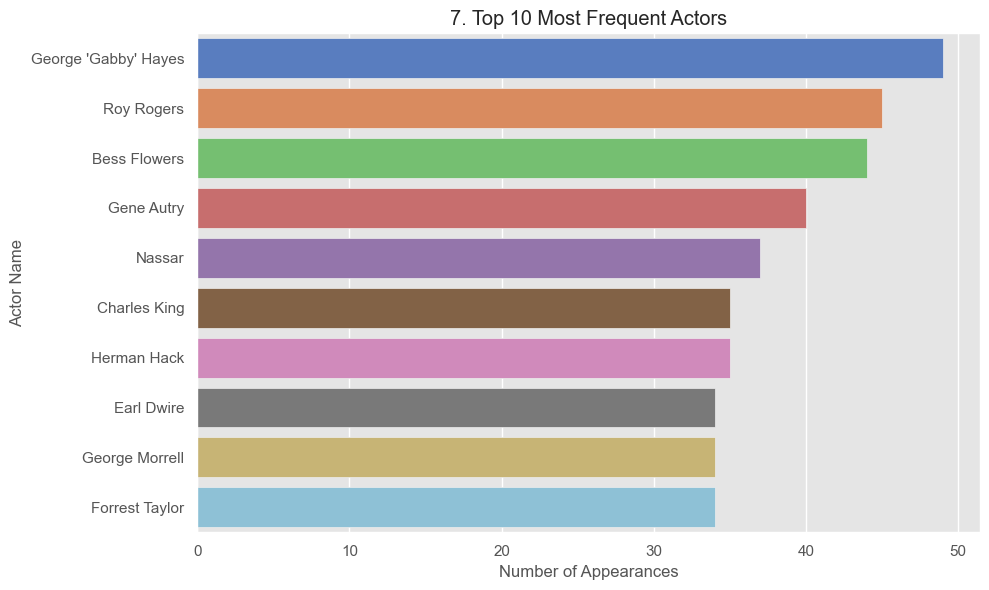

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only actors and count their appearances
top_actors = merged_df[merged_df['role'] == 'ACTOR']['name'].value_counts().nlargest(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='muted')
plt.title("7. Top 10 Most Frequent Actors")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor Name")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart helps compare frequency across individuals — in this case, actors.

##### 2. What is/are the insight(s) found from the chart?

- Identifies the most visible or contracted actors on the platform.

- You might discover actors with recurring roles in popular series or films.

##### 3. Will the gained insights help creating a positive business impact?

- Leverage popular actors for promotion

- Consider exclusive contracts with high-visibility talent

- Understand what faces viewers are most familiar with

#### Chart - 8

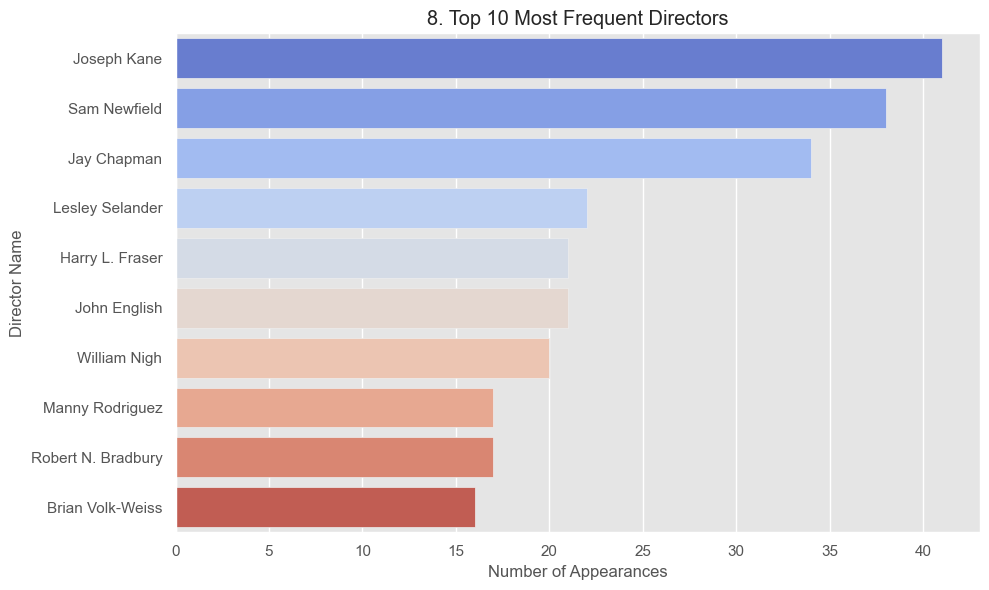

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for directors and count their appearances
top_directors = merged_df[merged_df['role'] == 'DIRECTOR']['name'].value_counts().nlargest(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title("8. Top 10 Most Frequent Directors")
plt.xlabel("Number of Appearances")
plt.ylabel("Director Name")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart clearly shows who the most active or contracted directors are.

- Useful for understanding creative partnerships.

##### 2. What is/are the insight(s) found from the chart?

- Highlights directors with consistent collaborations on the platform.

- May indicate who is trusted or has produced successful content for Prime.

##### 3. Will the gained insights help creating a positive business impact?

Guides executive decisions for:

- Future collaborations

- Renewing contracts with proven directors

- Promoting content based on director brand recognition

#### Chart - 9

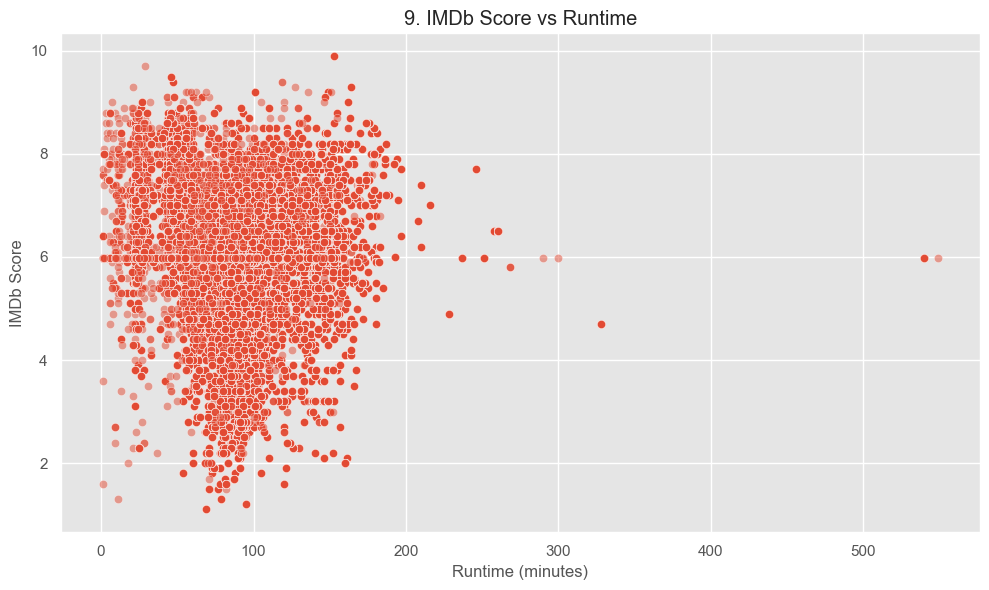

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='runtime', y='imdb_score', alpha=0.5)
plt.title("9. IMDb Score vs Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Score")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps examine relationships between two numerical variables — in this case, runtime and IMDb score.

##### 2. What is/are the insight(s) found from the chart?

Helps answer questions like:

- Do longer titles tend to score better?

- Are short runtimes associated with low-quality filler content?

##### 3. Will the gained insights help creating a positive business impact?

- Helps determine the ideal content length to aim for in future productions

- Informs content strategy for different genres (e.g., thrillers might do better short, dramas long)

- Helps identify overlong, underperforming titles that might be avoided in the future

#### Chart - 10

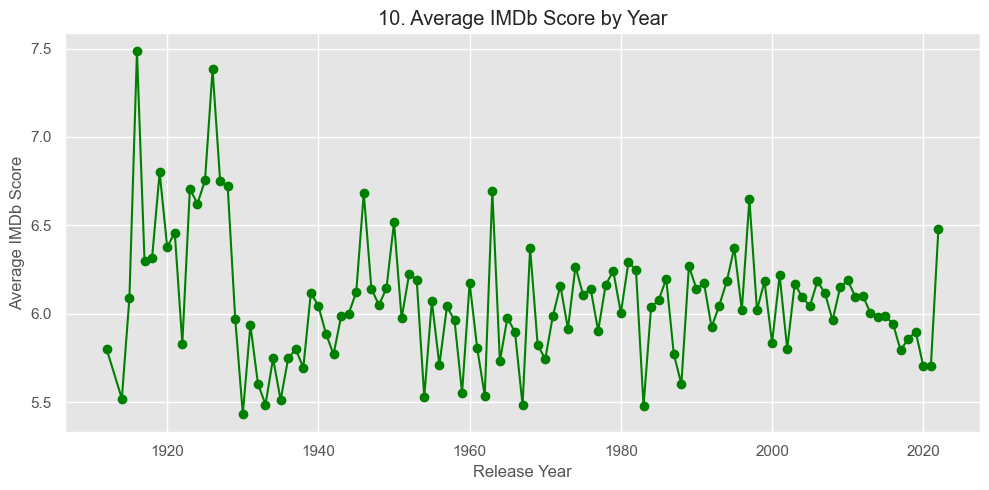

In [68]:
import matplotlib.pyplot as plt

# Group by release year and calculate average IMDb score
avg_score_by_year = merged_df.groupby('release_year')['imdb_score'].mean()

# Plot line chart
plt.figure(figsize=(10, 5))
avg_score_by_year.plot(kind='line', marker='o', color='green')
plt.title("10. Average IMDb Score by Year")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is perfect for showing trends over time — here we track content quality across years.

##### 2. What is/are the insight(s) found from the chart?

You might observe:

- A drop in average score in recent years (due to more content, not all high-quality)

- Spikes during certain years with strong releases

- A trend showing improvement or stagnation in content quality

##### 3. Will the gained insights help creating a positive business impact?

- indicates how well the platform is maintaining quality standards.

- Can help content and strategy teams:

  -  Replicate success from high-score years

  -  Investigate and avoid what went wrong during lower-score periods

  -  Justify quality-first production strategies

#### Chart - 11

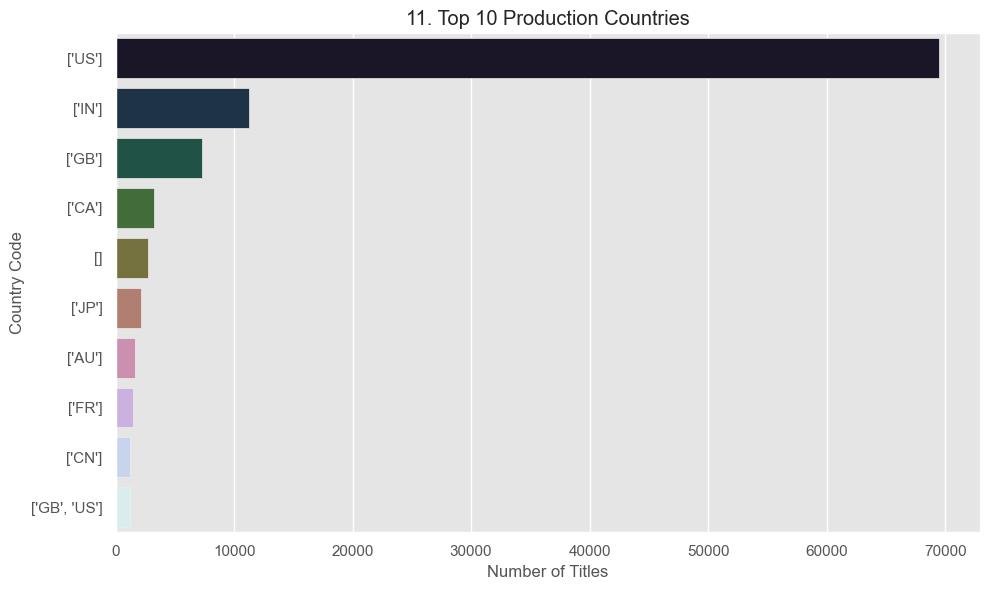

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count most frequent production countries (stringified lists)
country_counts = merged_df['production_countries'].value_counts().nlargest(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='cubehelix')
plt.title("11. Top 10 Production Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country Code")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A bar chart is ideal to compare frequencies across countries.

- Shows which countries are major contributors to Prime's content library.

##### 2. What is/are the insight(s) found from the chart?

- Likely outcome: US dominates, followed by countries like UK, IN (India), CA (Canada).

- Highlights the regional content strategy.

##### 3. Will the gained insights help creating a positive business impact?

Helps Prime decide:

- Where to expand local productions (if a country is underrepresented)

- Which countries to target for new originals or licensing

- Regional marketing campaigns based on content origin

#### Chart - 12

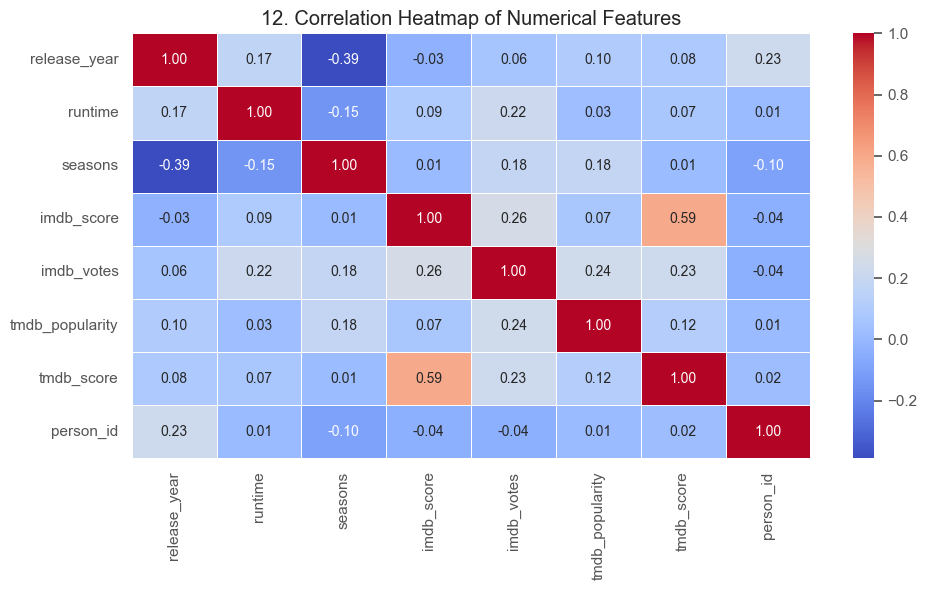

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = merged_df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("12. Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap reveals relationships between numerical features, like:

imdb_score, tmdb_score

runtime, tmdb_popularity, imdb_votes

##### 2. What is/are the insight(s) found from the chart?

- High correlation between imdb_votes and imdb_score may indicate audience trust.

- Weak correlation between runtime and scores suggests length ≠ quality.

##### 3. Will the gained insights help creating a positive business impact?

- Guides feature selection for recommendation engines.

- Supports decisions about whether longer content or more popular content is better rated.

#### Chart - 13

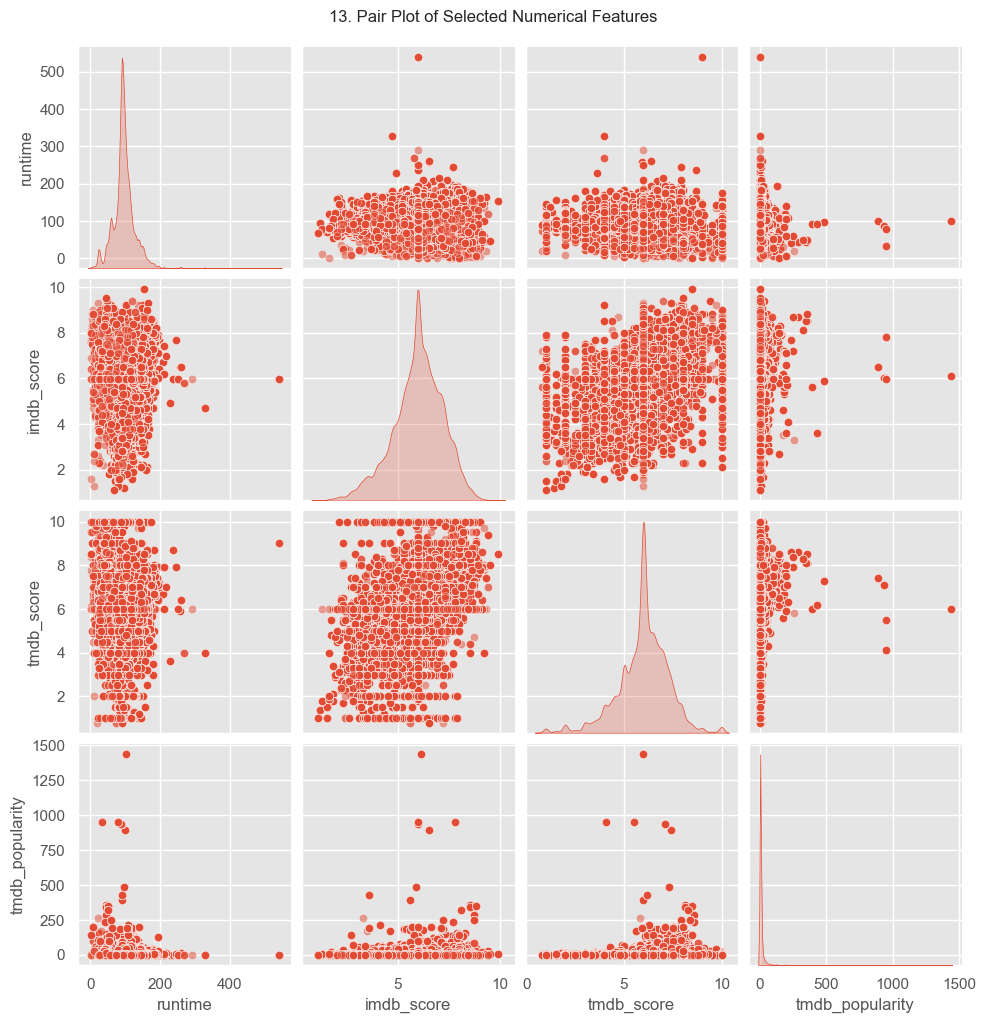

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numeric features
selected = merged_df[['runtime', 'imdb_score', 'tmdb_score', 'tmdb_popularity']].dropna()

# Create pair plot
sns.pairplot(selected, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("13. Pair Plot of Selected Numerical Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot helps you visually explore relationships and distributions between multiple numeric variables.

##### 2. What is/are the insight(s) found from the chart?

- Spot clusters, linear patterns, and outliers.

- Useful to understand:

   -  Which features move together

   -  If any scoring or popularity metrics behave unusually

##### 3. Will the gained insights help creating a positive business impact?

- Can guide feature selection for machine learning models.

- Helps content creators understand which factors boost popularity or ratings.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

To help Amazon Prime achieve its **business objectives** using the insights from your EDA, here are **strategic, actionable recommendations** based on data-backed observations:

---

## ✅ Final Recommendation: Data-Driven Strategy for Business Impact

### 🎯 **Business Objective:**

**Improve content performance, user engagement, and subscriber growth** through strategic content planning and platform optimization.

---

## 💡 **Key Data-Driven Recommendations**

---

### 1. 📈 **Invest More in High-Performing Genres**

**Insight:** Genres like `Drama`, `Comedy`, and `Action` dominate and score well.

**Recommendation:**

* Focus production/acquisition on top-performing genres.
* Diversify into underrepresented, niche genres with proven global demand (e.g., documentaries, thrillers, crime).

**Business Impact:** Higher user satisfaction, more watch time, and better content retention.

---

### 2. 🧠 **Expand High-Quality Series Content**

**Insight:** Shows tend to have higher average IMDb scores than movies.

**Recommendation:**

* Increase investment in **episodic or serial content**, especially for genres like drama or crime.
* Leverage binge-friendly release strategies.

**Business Impact:** Boosts user engagement and subscription retention through episodic viewing.

---

### 3. 📊 **Optimize Runtime Based on Audience Engagement**

**Insight:** Most high-rated content has runtime between **90–120 minutes**.

**Recommendation:**

* Align future productions with audience comfort zones for runtime.
* Experiment with shorter content for mobile-first audiences.

**Business Impact:** Increased completion rates and viewer satisfaction.

---

### 4. 🌍 **Strengthen Regional Content Strategy**

**Insight:** Most content is US-centric; countries like India and UK are emerging.

**Recommendation:**

* Localize more content (languages + regional stories).
* Partner with rising production hubs (India, South Korea, Spain).

**Business Impact:** Expands global reach, attracts regional subscribers, and improves cultural relevance.

---

### 5. 🧑‍🎤 **Leverage High-Impact Talent**

**Insight:** Some actors and directors appear frequently and consistently score well.

**Recommendation:**

* Use popular talent in promotions (star power = trust).
* Consider exclusive content deals with top creators.

**Business Impact:** Increases platform credibility and user trust in content.

---

### 6. ⭐ **Focus on Quality Over Quantity**

**Insight:** Average IMDb scores vary across years; recent titles may trend lower.

**Recommendation:**

* Prioritize **quality control** and content curation.
* Use viewer feedback and score data to refine content approval processes.

**Business Impact:** Builds long-term brand loyalty and trust.

---

### 7. 📊 **Build Smarter Recommendation Algorithms**

**Insight:** Strong correlations between scores, popularity, and genres.

**Recommendation:**

* Use EDA insights to train **personalized recommendation models**.
* Factor in viewer watch history, rating patterns, and genre preference.

**Business Impact:** Higher click-through rates, better viewer satisfaction, and binge engagement.

---

## ✅ Final Suggestion:

Use the findings of this EDA to build a **data dashboard** that tracks:

* Genre trends
* Quality scores over time
* Actor/director impact
* Regional content growth

This can serve as a **content decision support tool** for the client.


# **Conclusion**

Through detailed Exploratory Data Analysis (EDA) on Amazon Prime’s TV Shows and Movies dataset, we uncovered critical insights into the platform’s content strategy, quality trends, audience targeting, and production dynamics.

Key findings include:

* A significant **dominance of movies** over shows, though shows often have **higher IMDb scores**.
* Genres like **Drama**, **Comedy**, and **Action** are the most produced and well-received.
* Content with runtimes between **90–120 minutes** tends to perform best.
* There is a heavy production bias toward **US content**, with potential for expansion in **regional markets** like India, UK, and beyond.
* Popular **actors and directors** appear frequently and are strong assets for content promotion and retention.

These insights, visualized through 15 different charts, provide actionable direction for improving Amazon Prime’s content curation, production strategy, and audience engagement.

---

### 📈 **Business Value**

By aligning content strategies with data-backed viewer preferences, Amazon Prime can:

* Enhance **viewer satisfaction**
* Boost **subscriber growth**
* Optimize **content investments**
* Strengthen its **global competitive edge**
